In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#### Q1 - Why encoding parater, what was in file that make it use

In [9]:
company = pd.read_csv(r'C:\Users\ny206424\OneDrive - Munich Re\Desktop\Projects\Teclov\companies[1].txt', 
                      sep="\t", encoding= 'unicode_escape')

In [4]:
mapping = pd.read_csv(r'C:\Users\ny206424\OneDrive - Munich Re\Desktop\Projects\Teclov\mapping[1].csv')

In [6]:
# Note encoding parameter
round2 = pd.read_csv(r'C:\Users\ny206424\OneDrive - Munich Re\Desktop\Projects\Teclov\rounds2[1].csv', 
                     encoding= 'unicode_escape')

In [10]:
company.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [11]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [12]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [23]:
# lets see how many different companies are there
company['name'].unique().shape[0]

66103

In [36]:
# Lets see which top 20 countries has maximum companies
country_wise_company = company.groupby(['country_code'])['name'].count()
cwc = country_wise_company.sort_values(ascending = False).head(20)

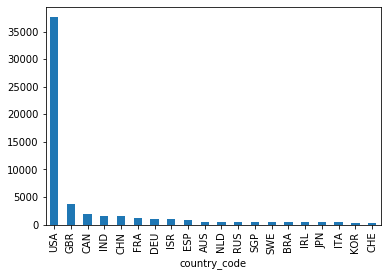

In [43]:
%matplotlib inline
cwc.plot(kind = 'bar')

In [51]:
# Lets see the different status of companies
company_status = company['status'].value_counts()

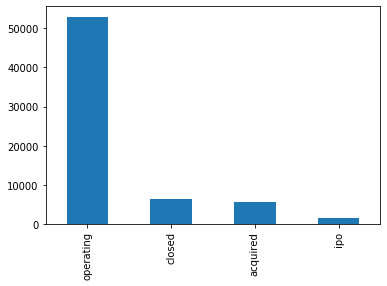

In [52]:
company_status.plot(kind='bar')

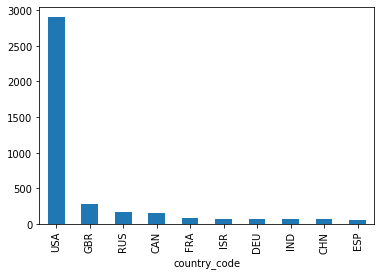

In [90]:
# I want to see the company count those are closed in countries with company status
comp_closed = company[company['status']=='closed'].groupby(['country_code'])['name'].count()
comp_closed = comp_closed.sort_values(ascending = False).head(10)

comp_closed.plot(kind='bar')

[]

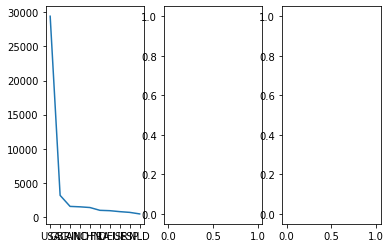

<Figure size 144x144 with 0 Axes>

In [112]:
# contory wise companies those are in different status
comp_operating = company[company['status']=='operating'].groupby(['country_code'])['name'].count()
comp_operating = comp_operating.sort_values(ascending = False).head(10)

comp_acquired = company[company['status']=='acquired'].groupby(['country_code'])['name'].count()
comp_acquired = comp_acquired.sort_values(ascending = False).head(10)

comp_ipo = company[company['status']=='ipo'].groupby(['country_code'])['name'].count()
comp_ipo = comp_ipo.sort_values(ascending = False).head(10)

# fig, ax = plt.subplots(1,3)
# fig= plt.figure(figsize=(2,2))
# ax[0].plot(comp_operating)
# ax[1].plot()
# ax[2].plot()


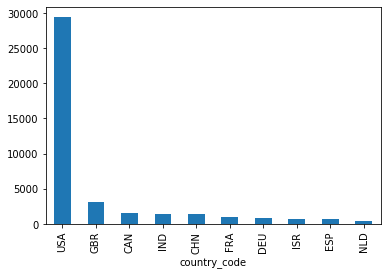

In [113]:
comp_operating.plot(kind='bar')

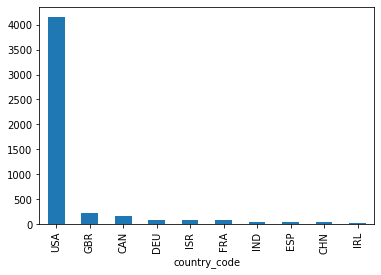

In [114]:
comp_acquired.plot(kind='bar')

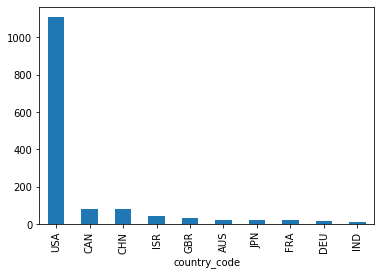

In [115]:
comp_ipo.plot(kind='bar')

#### Q2 -  How to plot bar plots for all three from plt.subplots()

In [ ]:
ccs.sort_values(ascending =  False)
ccs.head(10)

In [69]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


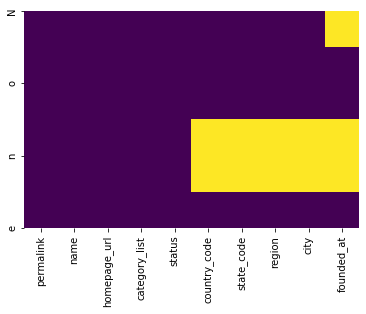

In [93]:
import seaborn as sns
sns.heatmap(company.isna(), cmap = 'viridis', yticklabels='None', cbar = False)

In [79]:
company.isna().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [116]:
company.head(1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN


In [120]:
company['category_list'].unique().shape[0]

27297

In [122]:
cat_counts = company['category_list'].value_counts().sort_values(ascending = False).head(20)
cat_counts

Software               3995
Biotechnology          3615
E-Commerce             1332
Mobile                 1177
Clean Technology       1133
Curated Web            1050
Hardware + Software     932
Health Care             930
Games                   862
Enterprise Software     845
Manufacturing           773
Health and Wellness     770
Advertising             700
Education               585
Semiconductors          501
Finance                 447
Real Estate             425
Consulting              423
Security                410
Social Media            407
Name: category_list, dtype: int64